In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns



BASIC QUESTIONS

The data from the csv is read using read_csv function
this data is in the format (1599rows * 1columns), to separate this (sep = ';') is used and converted to a dataframe

In [16]:
df = pd.read_csv('winequality-red.csv',sep = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


.dtypes is used to obtain datatypes of each columns

In [18]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

.isnull() idicates the number of null data in the row /column . (.sum()) is used to get total number of null values present (here no null value is present in the data set)

In [19]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


EDA QUESTIONS

I used seaborn to draw the lineplot. It helps to understand graph faster than matplotlib. 
In the below graph we can seethe mean value indicated by blue line and the light blue area is the std deviation of alcohol % for particular quality.

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

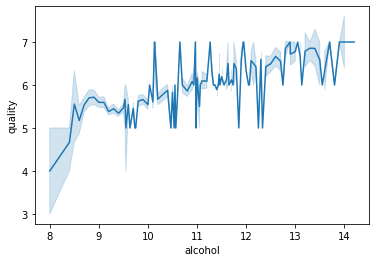

In [30]:
sns.lineplot(data = df, x = 'alcohol', y = 'quality')

.groupby("") grouped all the data comprising quality with its repeated values and .mean() calculated mean of the data.
.loc[i] gives data at ith position.
Pie charts of compositions according to quality values are displayed below. 

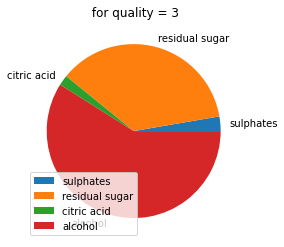

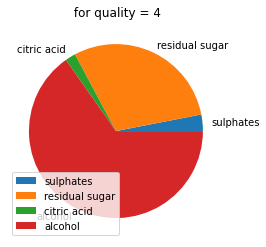

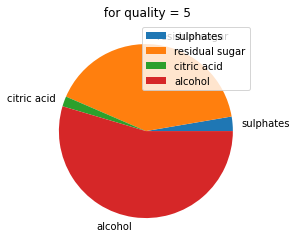

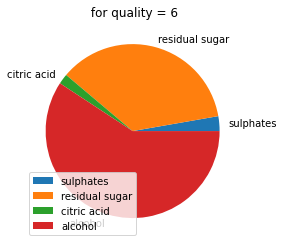

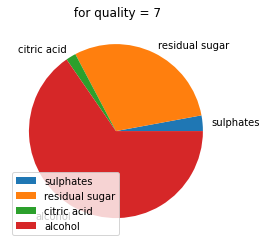

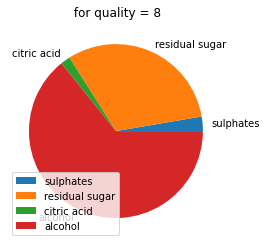

In [31]:
pie_data = df.groupby('quality').mean()
#pie_data.plot.pie(y = pie_data.loc[3])
#pie_data.loc[3].loc["residual sugar"]

for i in range(3,9):
     sul = pie_data.loc[i].loc["sulphates"]
     sug = pie_data.loc[i].loc["residual sugar"]
     cit = pie_data.loc[i].loc["citric acid"]
     alc = pie_data.loc[i].loc["alcohol"]
     arr = [sul, sug,cit,alc]
     keys = ['sulphates','residual sugar','citric acid','alcohol']
     plt.title(f" for quality = {i}" )
     plt.pie(arr, labels = keys)
     plt.legend()
     plt.show()


power(10,arr[i]) gives 10^(arr[i]) value , and by this way we get antilog. 

In [ ]:
antilog_pH = []
arr = []
arr = df.pH
for i in range(1599):
    antilog_pH.append(np.power(10,-arr[i]))
antilog_pH

now after creating antilog_pH array .insert(number, name, array) is used to inster it in the 12th place.

In [20]:
df.insert( 12 , "Antilog of pH", antilog_pH)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Antilog of pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.001000
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.000501
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.000550
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.000646
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.000646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.001122
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.000575
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.000708
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.000575


A box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. 

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Antilog of pH                 AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

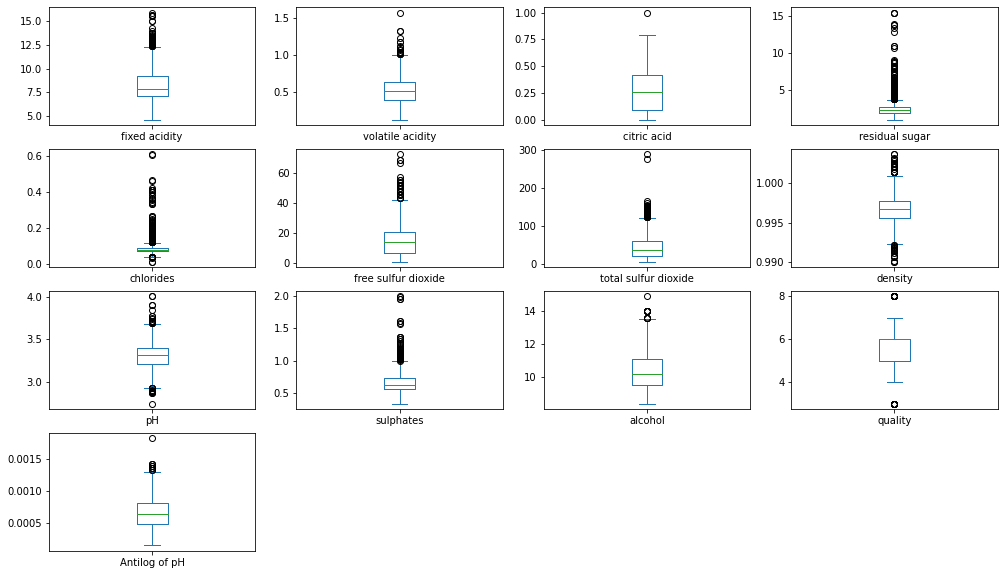

In [21]:
df.plot(kind ='box',subplots = True, layout =(4,4), figsize=(17,10) )

In [36]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


MACHINE LEARNING IMPLEMENTATION

in implementation of  Machine learning implementation, first we created a 2D array with 11 rows neglecting last row(quality). Then with 1D array of (quality) we compared the data to best fit the SVC model using linear method.
the test size was 0.2 that is 20 percent of the data to create new data for the tested program.



In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('winequality-white.csv',sep = ';')
df1.head()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

here it is done using RandomForestClassifier

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('winequality-white.csv',sep = ';')
df1.head()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


model = RandomForestClassifier(n_estimators =600 , criterion = 'gini')
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7081632653061225


here it is done using KNeighboursClassifier

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('winequality-white.csv',sep = ';')
df1.head()

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))


Accuracy Score: 0.4479591836734694
